# Loan Default Prediction

### The objective of this project was to predict whether or not the the person will default on the loan that was received. To achieve this, the data must to cleaned and prepped, before the data is modeled.

#### To start the necessary libraries are imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

/Users/DK/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/DK/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Load the data set

In [2]:
df = pd.read_csv('LoansTrainingSet.csv')

## Data exploration

#### The data set will be further explored to understand what needs to be cleaned and how to go about handling it.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            256984 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [4]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [5]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [6]:
loan_status_table = pd.crosstab(index=df['Loan Status'], columns=[df['Term']], normalize='columns')
loan_status_table

Term,Long Term,Short Term
Loan Status,,
Charged Off,0.462037,0.265065
Fully Paid,0.537963,0.734935


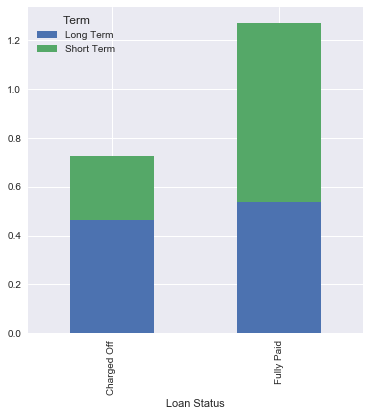

In [7]:
loan_status_table.plot(kind='bar', figsize=(6,6), stacked=True)

#### It appears that there are credit scores that are not valid scores in that the highest score is 850 yet there are scores above 1000. So it was handled by dividing those scores by 10.

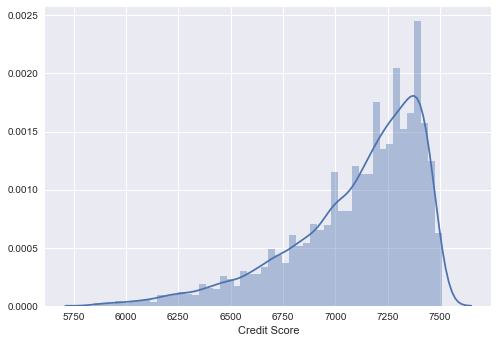

In [8]:
credit = df[~df['Credit Score'].isnull()]
invalid_cred = credit[credit['Credit Score']>850]
sns.distplot(invalid_cred['Credit Score'])
df['Credit Score'] = df['Credit Score'].apply(lambda x: x/10 if x > 850 else x)

#### It appears that there is an extra "other" column so the column was incorporated into the "Other" column

In [9]:
df['Purpose'] = df['Purpose'].replace('other', 'Other')
term_table = pd.crosstab(index=df['Term'], columns=[df['Purpose']], normalize='columns')
term_table

Purpose,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip
Term,,,,,,,,,
Long Term,0.262946,0.269281,0.20757,0.258358,0.067416,0.274086,0.177127,0.192313,0.077707
Short Term,0.737054,0.730719,0.79243,0.741642,0.932584,0.725914,0.822873,0.807687,0.922293


In [10]:
home_purpose_table = pd.crosstab(index=df['Home Ownership'], columns=df['Purpose'], normalize='columns')
home_purpose_table

Purpose,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip
Home Ownership,,,,,,,,,
HaveMortgage,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.365605
Home Mortgage,0.476443,0.37451,0.422161,0.482397,0.269663,0.781897,0.441074,0.372300,0.000000
Own Home,0.087224,0.10915,0.113553,0.083772,0.063670,0.136105,0.100418,0.100856,0.090446
Rent,0.436333,0.51634,0.464286,0.433831,0.666667,0.081998,0.458508,0.526844,0.543949


#### According to the data dictionary, there are three valid values: Home Mortgage, Own Home, Rent. So the HaveMortgage is incorporated into the Home Mortgage column

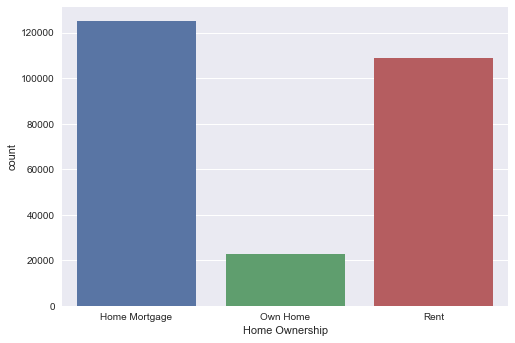

In [11]:
df['Home Ownership'] = df['Home Ownership'].replace('HaveMortgage', 'Home Mortgage')
sns.countplot(x='Home Ownership',data=df)

In [12]:
term_plot = pd.crosstab(index=df['Loan Status'], columns=[df['Home Ownership']], normalize='columns')
term_plot

Home Ownership,Home Mortgage,Own Home,Rent
Loan Status,,,
Charged Off,0.282445,0.326702,0.348445
Fully Paid,0.717555,0.673298,0.651555


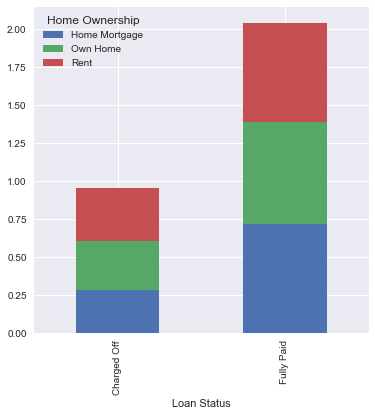

In [13]:
term_plot.plot(kind='bar', figsize=(6,6), stacked=True)

In [14]:
bankruptcy = pd.crosstab(df['Bankruptcies'], df['Purpose'], margins=True)
bankruptcy

Purpose,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,All
Bankruptcies,,,,,,,,,,
0.0,4312,1374,3005,182103,248,12918,2556,21743,1402,229661
1.0,341,144,239,20601,9,1854,295,1970,152,25605
2.0,12,7,13,729,0,85,10,93,8,957
3.0,5,2,0,134,0,19,1,16,3,180
4.0,2,0,4,25,0,0,0,2,0,33
5.0,0,0,1,13,0,1,0,0,0,15
6.0,0,0,0,1,0,1,0,1,0,3
7.0,0,0,0,1,0,0,0,0,0,1
All,4672,1527,3262,203607,257,14878,2862,23825,1565,256455


In [15]:
tax_liens_crossT = pd.crosstab(df['Tax Liens'], df['Purpose'], margins=True)
tax_liens_crossT

Purpose,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,All
Tax Liens,,,,,,,,,,
0.0,4588,1498,3238,200264,266,14579,2827,23522,1540,252322
1.0,80,26,32,2562,0,232,27,293,24,3276
2.0,21,3,2,702,0,64,10,67,3,872
3.0,13,0,0,184,0,19,2,28,1,247
4.0,4,0,1,95,0,13,0,11,0,124
5.0,2,0,0,48,0,3,1,7,0,61
6.0,2,2,1,21,0,2,0,1,1,30
7.0,0,0,1,4,0,0,1,0,0,6
8.0,2,0,1,3,0,0,0,2,0,8


#### Intuitively Maximum Open Credit seems like a value that should not be an object type

In [16]:
df['Maximum Open Credit'].head()

0    16056
1    19149
2    28335
3    43915
4    37081
Name: Maximum Open Credit, dtype: object

#### However because the #VALUE it was not possible to convert the values so they were replaced with a 0.

In [17]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace('#VALUE!', 0).astype(float)

#### It seemed odd that there are so many values that are 0 for Maximum Open Credit 

In [18]:
no_max_cred = df[df['Maximum Open Credit'] == 0]
no_max_cred['Maximum Open Credit'].value_counts()

0.0    1835
Name: Maximum Open Credit, dtype: int64

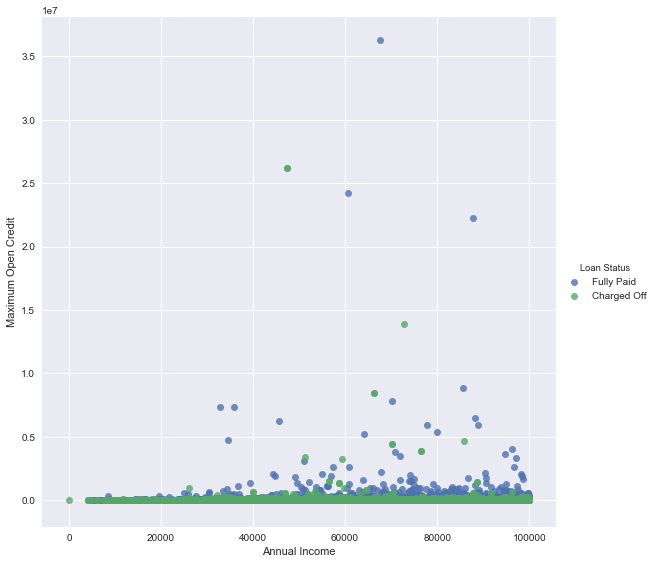

In [19]:
sns.lmplot(x='Annual Income', y='Maximum Open Credit', data=df[df['Annual Income']<100000], size=8, fit_reg=False, hue='Loan Status')

#### Therefore those values were changed to the median value

In [20]:
df['Maximum Open Credit'] = np.where(df['Maximum Open Credit'] == 0, df['Maximum Open Credit'].median(), df['Maximum Open Credit'])

#### The similar situation appears with the Monthly Debt column so the dollar sign and the comma was removed before the values were converted to floats

In [21]:
df['Monthly Debt'] = df['Monthly Debt'].str.strip('$')
df['Monthly Debt'] = df['Monthly Debt'].replace(',', '', regex=True).astype(float)

#### The same was done for the Years in current job column

In [22]:
df['Years in current job'] = df['Years in current job'].str.strip('+ years')
df['Years in current job'] = df['Years in current job'].replace('n/', 0)
df['Years in current job'] = df['Years in current job'].replace('< 1', 0).astype(int)

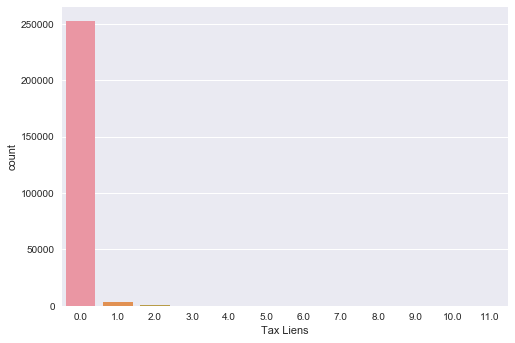

In [23]:
sns.countplot(x='Tax Liens', data=df)

#### Current Loan Amount appears to have an outlier of 999999999 and it was replaced with the value of 0

In [24]:
df['Current Loan Amount'].max()

99999999

In [25]:
loan_count = df[df['Current Loan Amount']>999999]
loan_count['Current Loan Amount'].count()

35210

In [26]:
df['Current Loan Amount'] = np.where(df['Current Loan Amount'] == 99999999, 0, df['Current Loan Amount'])

## Data cleaning

#### After exploring the data and understanding the data more in depth, it is time to deal with missing values

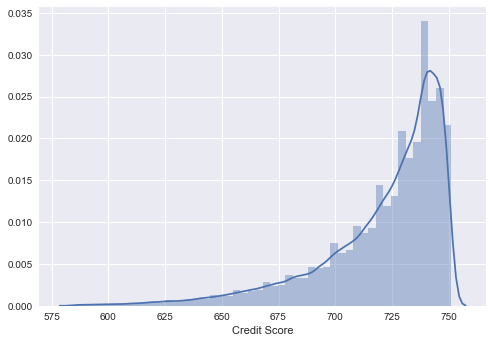

In [27]:
notnull_cred = df[~df['Credit Score'].isnull()]
sns.distplot(notnull_cred['Credit Score'])

#### Null values for Credit Score and Annual Income are filled with the median values 

In [28]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())

In [29]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())

#### The same was done for Bankruptcies and Tax Liens, both of which are 0

In [30]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(0)
df['Tax Liens'] = df['Tax Liens'].fillna(0)

#### The null values for Months since last delinquent are dealt with using Random Forest Regression

In [31]:
df['bad_credit'] = df['Credit Score'].map(lambda x: 1 if x<629 else 0)
df['fair_credit'] = df['Credit Score'].map(lambda x: 1 if 630<x<689 else 0)
df['good_credit'] = df['Credit Score'].map(lambda x: 1 if 690<x<719 else 0)
df['excellent_credit'] = df['Credit Score'].map(lambda x: 1 if x>720 else 0)

feat = df[['Months since last delinquent', 'Credit Score', 'bad_credit', 'fair_credit', 'good_credit', 'excellent_credit']]
feat_train = feat.loc[df['Months since last delinquent'].notnull()]
feat_test = feat.loc[df['Months since last delinquent'].isnull()]
feat_x = feat_train.values[:,1::]
feat_y = feat_train.values[:,0]
rf = RandomForestRegressor(n_estimators=200)
rf.fit(feat_x,feat_y)
pred_feat = rf.predict(feat_test.values[:,1::])
df.loc[(df['Months since last delinquent'].isnull()), 'month_since_last_delinquent'] = pred_feat
df['month_since_last_delinquent'] = np.where(np.isnan(df['month_since_last_delinquent']), df['Months since last delinquent'], df['month_since_last_delinquent'])
df.drop('Months since last delinquent', axis=1, inplace=True)





## Feature Engineering

#### Once the missing values have been filled, features are be created and enhanced to increase the accuracy of the model

In [32]:
df['bankrupted'] = df['Bankruptcies'].map(lambda x: 1 if x > 0 else 0)

In [33]:
df['had_tax_leins'] = df['Tax Liens'].map(lambda x: 1 if x > 0 else 0)

In [34]:
df['no_credit_problems'] = df['Number of Credit Problems'].map(lambda x: 1 if x == 0 else 0)

In [35]:
df['not_debt_consolidation'] = df['Purpose'].map(lambda x: 0 if x == 'Debt Consolidation' else 1)

In [36]:
df['debt_to_income_ratio'] = (df['Monthly Debt'] * 12)/(df['Annual Income'])
df['good_ratio'] = df['debt_to_income_ratio'].map(lambda x: 1 if x < .3 else 0)

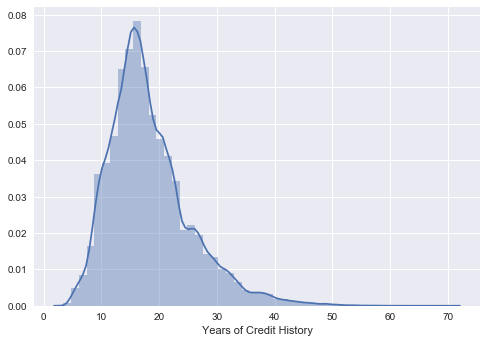

In [37]:
sns.distplot(df['Years of Credit History'])

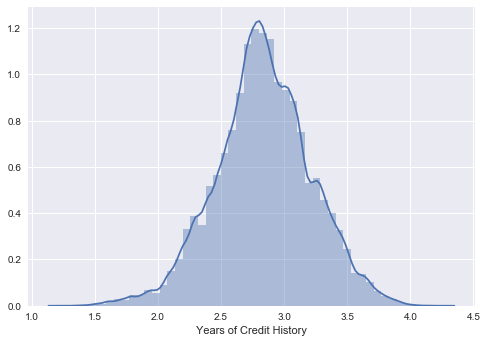

In [38]:
df['Years of Credit History']=df['Years of Credit History'].map(lambda x: np.log(x))
sns.distplot(df['Years of Credit History'])

## Modeling 

#### now that features have been extracted, it is time to make predictions using the data set

#### first the duplicate rows need to be removed 

In [39]:
print "There are", df.duplicated(['Loan ID', 'Customer ID']).sum(), "rows"

There are 41284 rows


In [40]:
df1 = df.drop('Loan ID', 1)
df1 = df1.drop('Customer ID', 1)

In [41]:
df1 = pd.get_dummies(df1, drop_first=True)

In [42]:
columns = pd.concat([df['Loan ID'], df['Customer ID']], axis=1)
df1 = pd.concat([columns, df1], axis=1)
df1 = df1.groupby('Loan ID').mean()

In [43]:
y = df1['Loan Status_Fully Paid']
X = df1.drop(['Loan Status_Fully Paid'], axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.6)

In [45]:
model = RandomForestClassifier(n_estimators=200)
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(pred, y_test)

0.86364163189615206